# Анализ закономерностей, которые определяют успешность компьютерных игр/ Analysis of the patterns that influence the success of computer games 

# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

У нас есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
- «T» («Teen») — «Подросткам 13—19 лет»
- «M» («Mature») — «От 17 лет»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» ( «Rating Pending»») — «Рейтинг ожидается»

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Примечание. Данные за 2016 год могут быть неполными.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings


# Шаг 1. Изучение и обработка данных

1  Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет 


In [ ]:
try:
    games = pd.read_csv('games.csv')
    games
except:
    games = pd.read_csv('/datasets/games.csv')
    games

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
games[games['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
games = games.dropna(subset = ['Name'])

In [9]:
games.isnull().sum(axis=0).sort_values()

Name                  0
Platform              0
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Year_of_Release     269
User_Score         6699
Rating             6764
Critic_Score       8576
dtype: int64

In [10]:
games.duplicated().sum()

0

In [11]:
games[games['Year_of_Release'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
games[games['Critic_Score'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
games = games.drop_duplicates()

Везде пропущенные данные типа NaN. С ними работать можно не изменя тип. ОСтавлю без изменений.


Итого:
Есть пропуски: Name, Genre, Year of Release, Critic_Score, User_Score, Rating 
Надо менять форматы данных

# Шаг 2. Подготовка данных

Подготовка данных
- Замените названия столбцов (приведите к нижнему регистру); 
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; 
- Обработайте пропуски при необходимости: 
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [14]:
#Замените названия столбцов (приведите к нижнему регистру)
games.columns = games.columns.str.lower()

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему:

year_of_release -формат float, надо int (содержат целочисленные данные)
user_score - тип данных object, надо float (содержат целочисленные данные)
critic_score - переведу в int, так как там целые числа а не дроби

In [16]:
#Заменим значение "tbd" - "to be determined" на NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [17]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['user_score'] = games['user_score'].astype('float')
games['critic_score'] = games['critic_score'].astype('Int64')

In [18]:
# заполняем пропущенные значения в столбце 'year_of_release' нулями. Данных нет, пусть будут нули. Забыли указать, упустили
#games['year_of_release'] = games['year_of_release'].fillna(0)
games[games['year_of_release'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


</font><font color='Blue'><b>269 столбцов из 16522 не заполнены. Можно удалить значения.</b></font><br>

In [19]:
games = games.dropna(subset=['year_of_release']) 

In [20]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [21]:
#заменим пропущенные значения на "undefiend". Данных нет, пусть будет такое значение. Может не оценен фильм вообщем
games["rating"] = games['rating'].fillna("undefined")

In [22]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
#всего два пропуска в имени, можем удалить. Это же и решает пропуск в жанре
games = games.dropna(subset = ['name'])

In [24]:
games.duplicated().sum()

0

In [25]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [26]:
games['critic_score'].unique()
#нет критичных данных для удаления или работы, просто нет данных по оценке критиков

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   41,   36,   31,   27,   35,   26,   19,   28,   23,
   24,   21,   17,   13]
Length: 82, dtype: Int64

In [27]:
games['user_score'].unique()
#аналогичная ситуация по оценке пользователями. Оставляем данные без изменений

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [28]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,undefined
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,undefined


In [29]:
#Создаю дополнительный столбец с суммой продаж по всем регионам 'total_sales'
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,undefined,0.01


Причины пропусков в данных:
    critic_score - не все игры оценены критиками, может часть новых игр и еще их не просмотрели, на равне и с user_score. А может пользователи не хотят оценивать игру, возможно форма не удобна для оценки.

# Шаг 3. Исследовательский анализ данных

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? +
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? +
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.+
Не учитывайте в работе данные за предыдущие годы. +
4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.+
5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. +
6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.+
7. Соотнесите выводы с продажами игр на других платформах.+
8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? +


In [31]:
print(games.groupby('year_of_release')['name'].count()) 

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


In [32]:
games.pivot_table(
    index = ['year_of_release',  'platform'],
    values = 'total_sales', 
    aggfunc = 'sum'
    ).sort_values(['year_of_release', 'total_sales'],  ascending=[True, False])

total_sales
year_of_release platform             
1980            2600            11.38
1981            2600            35.68
1982            2600            28.88
1983            NES             10.96
                2600             5.84
...                               ...
2016            WiiU             4.60
                PSV              4.25
                PS3              3.60
                X360             1.52
                Wii              0.18

[238 rows x 1 columns]

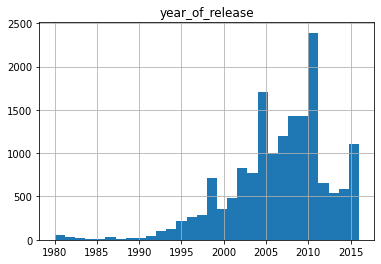

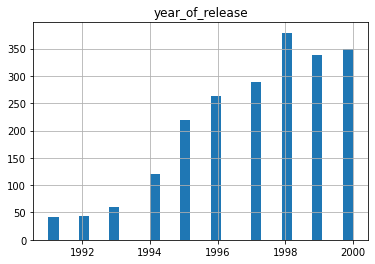

In [33]:
games.hist('year_of_release', bins=30, range=(1980, 2016));
plt.show()
games.hist('year_of_release', bins=30, range=(1991, 2000))
plt.show()

In [34]:
print('Игры до 1980 года:', games.query('year_of_release <= 1980')['year_of_release'].count())
print('Игры с 1981 по 1990 года:', games.query('1990 >= year_of_release <= 1981')['year_of_release'].count())
print('Игры с 1991 по 2000 года:', games.query('2000 >= year_of_release <= 1991')['year_of_release'].count())
print('Игры с 2001 по 2010 года:', games.query('2010 >= year_of_release <= 2001')['year_of_release'].count())
print('Игры с 2011 по 2016 года:', games.query('2016 >= year_of_release <= 2011')['year_of_release'].count())

Игры до 1980 года: 9
Игры с 1981 по 1990 года: 55
Игры с 1991 по 2000 года: 262
Игры с 2001 по 2010 года: 2806
Игры с 2011 по 2016 года: 13558


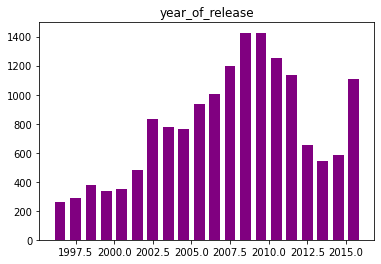

In [35]:
games.hist('year_of_release', grid=False, bins=20, range=(1996, 2016), rwidth= .7 , color='purple');

Больще всего игр было 2008-2009 годах

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


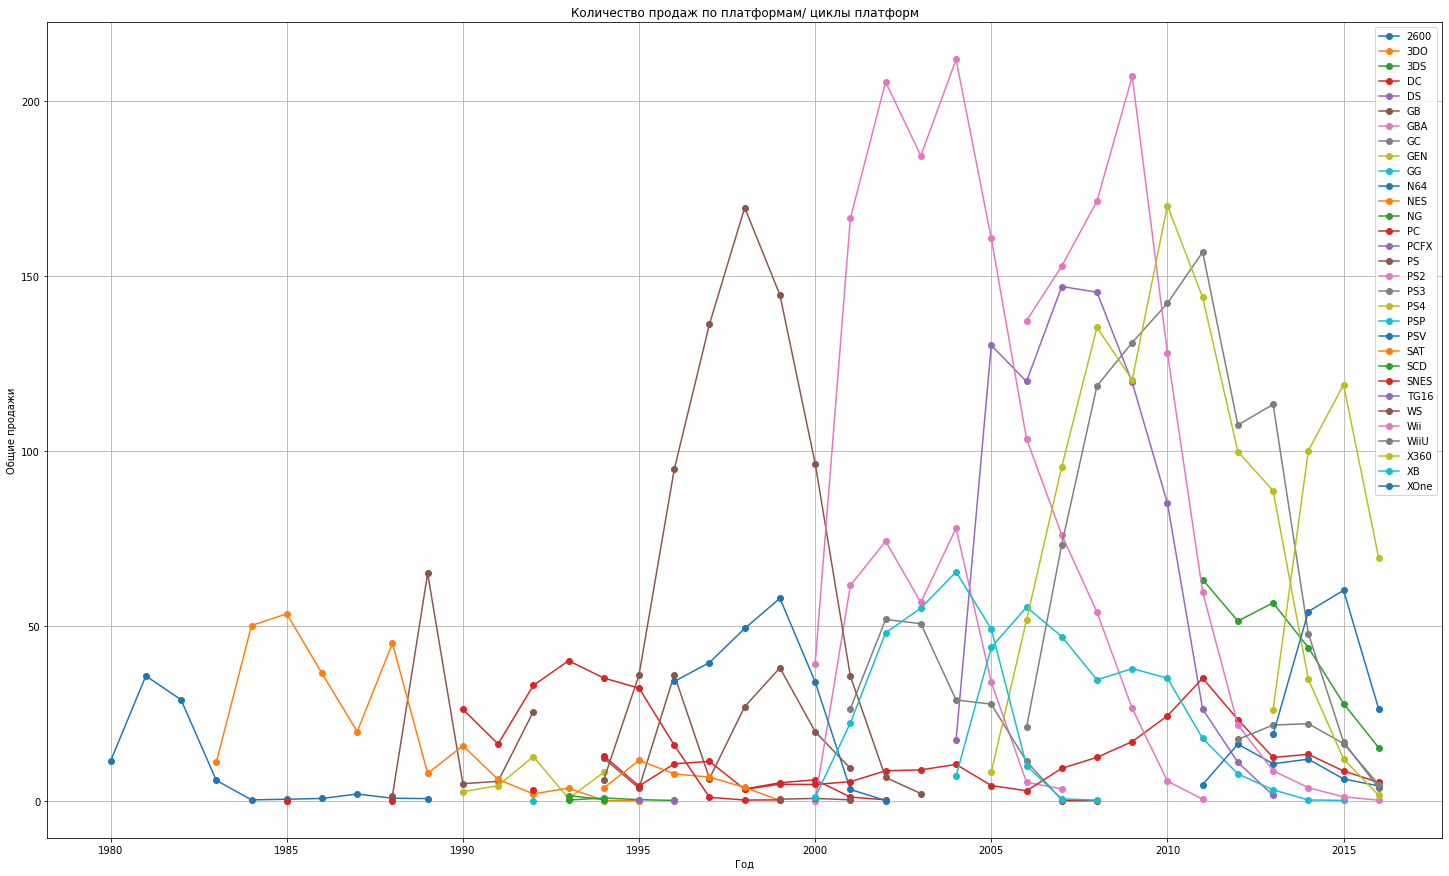

In [36]:
#построим график распределения по платформам и годам
games.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(25, 15), style='o-')
plt.title("Количество продаж по платформам/ циклы платформ")
plt.xlabel("Год")
plt.ylabel("Общие продажи")
plt.legend()
plt.show()

In [37]:
platforms = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top_platforms = platforms.head(5).reset_index().rename_axis(None, axis=1)
top_platforms


,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


In [38]:
games1 = games.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS']")
games1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,<NA>,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,<NA>,NaN,undefined,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01


In [39]:
games1.pivot_table(
    index = ['year_of_release',  'platform'],
    values = 'total_sales', 
    aggfunc = 'sum'
    ).sort_values(['year_of_release', 'total_sales'],  ascending=[True, False])

total_sales
year_of_release platform             
1985            DS               0.02
2000            PS2             39.17
2001            PS2            166.43
2002            PS2            205.38
2003            PS2            184.31
2004            PS2            211.81
                DS              17.27
2005            PS2            160.66
                DS             130.14
                X360             8.25
2006            Wii            137.15
                DS             119.81
                PS2            103.42
                X360            51.62
                PS3             20.96
2007            Wii            152.77
                DS             146.94
                X360            95.41
                PS2             75.99
                PS3             73.19
2008            Wii            171.32
                DS             145.31
                X360           135.26
                PS3            118.52
                PS2             53.90
2009            Wii            206.97
                PS3            130.93
                X360           120.29
                DS             119.54
                PS2             26.40
2010            X360           170.03
                PS3            142.17
                Wii            127.95
                DS              85.02
                PS2              5.64
2011            PS3            156.78
                X360           143.84
                Wii             59.65
                DS              26.18
                PS2              0.45
2012            PS3            107.36
                X360            99.74
                Wii             21.71
                DS              11.01
2013            PS3            113.25
                X360            88.58
                Wii              8.59
                DS               1.54
2014            PS3             47.76
                X360            34.74
                Wii              3.75
2015            PS3             16.82
                X360            11.96
                Wii              1.14
2016            PS3              3.60
                X360             1.52
                Wii              0.18

Количество продаж по Топ-платформам и годам


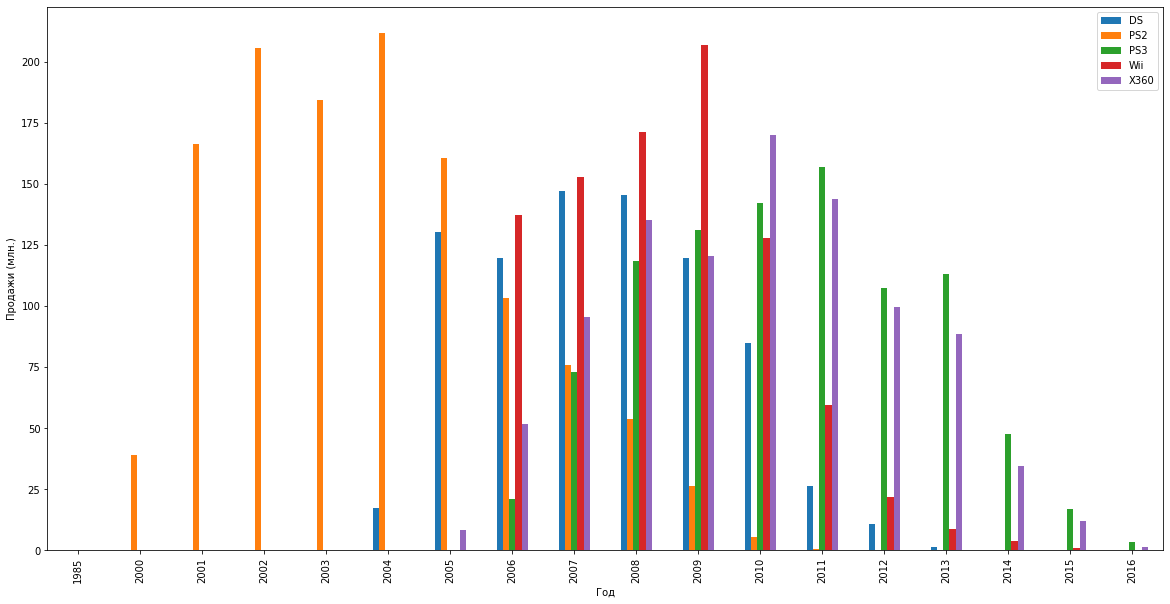

In [40]:
print("Количество продаж по Топ-платформам и годам")
games1.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(kind='bar',grid=False, figsize=(20, 10))
plt.xlabel("Год")
plt.ylabel("Продажи (млн.)")
plt.legend()

In [41]:
#напишу свою функцию для показа графиков по общим продажам и годам по платформам
def platform_total_sales_in_years(name, data):
    games_new = games[(games['platform'] == name) & (games['year_of_release'] >= 1985)]
    total = games_new.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=True)
    return total

In [42]:
top_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


Количество продаж по Топ-платформам и годам


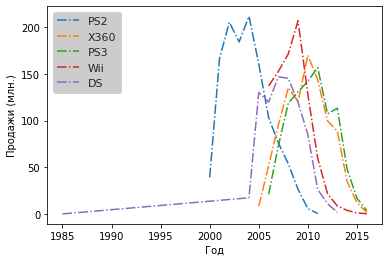

In [43]:
print("Количество продаж по Топ-платформам и годам")
for platform in list(top_platforms['platform']):
    sns.lineplot(data=platform_total_sales_in_years(platform,games)['total_sales'], label=platform, linestyle='-.')
    sns.set(rc={'axes.facecolor':'silver', 'figure.facecolor':'silver'})
    plt.xlabel("Год")
    plt.ylabel("Продажи (млн.)")
    plt.legend()

Выводы: многие платформы работают от 8 до 10 лет в среднем. Много платформ появилось в 2006 году.

#Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Я думаю, что раз многие платформы появились в 2006 году, то к 2016 году они как правило не актуальны.Они прожили целый цикл. Брать их данные на пике, это внесение смуты в данные. Думаю, что стоит взять период с их средней работы, с года 2012. Анализируя прошедшие пять лет, можно сделать прогноз на 2017 год.

In [44]:
actual_data = games.query('year_of_release >= 2012')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01


In [45]:
#Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
actual_2016_pvt = actual_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
actual_2016_pvt

,platform,total_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


Продажи по платформам c 2012 по 2016 г.г.


Text(0, 0.5, 'Количество продаж')

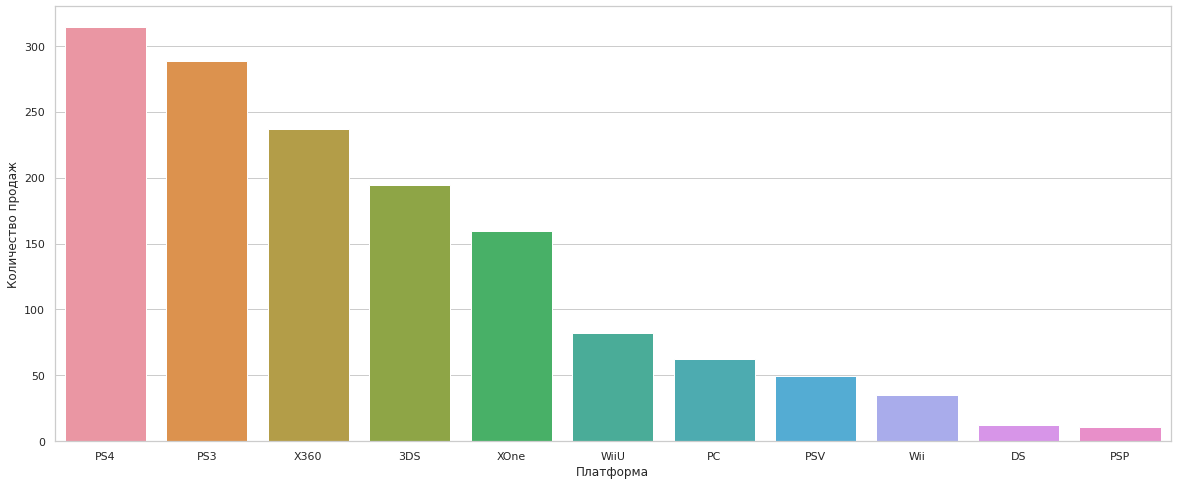

In [46]:
print("Продажи по платформам c 2012 по 2016 г.г.")
sns.set_style('whitegrid')
plt.figure(figsize=(20, 8))
sns.barplot(data = actual_2016_pvt, x='platform', y='total_sales')
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

Жизненный цикл Топ 5 платформ

[Text(0.5, 1.0, 'Цикл Топ-5 платформ'),
 Text(0.5, 39.5, 'Год релиза'),
 Text(156.5, 0.5, 'Платформа')]

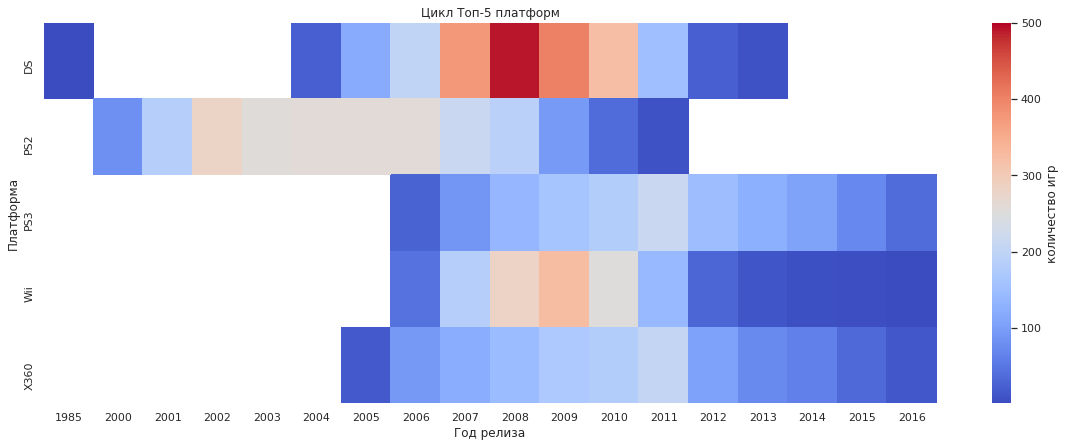

In [47]:
cycle = games1.pivot_table(index='year_of_release', columns = 'platform', values ='name', aggfunc = 'count')
plt.figure(figsize=(20,7))
sns.heatmap(cycle.T, cbar_kws={'label': 'количество игр'}, cmap='coolwarm', vmax=500)\
.set(title='Цикл Топ-5 платформ', xlabel='Год релиза', ylabel='Платформа')

у платформы DS выяснились данные, которыми она не могла обладать на 1985 год. Так как платформа появилась только в 2004 года. Сделаем сред и раберемся что это за данные.

In [48]:
strange = games1.query('year_of_release == 1985')
strange

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,undefined,0.02


<AxesSubplot:xlabel='year_of_release'>

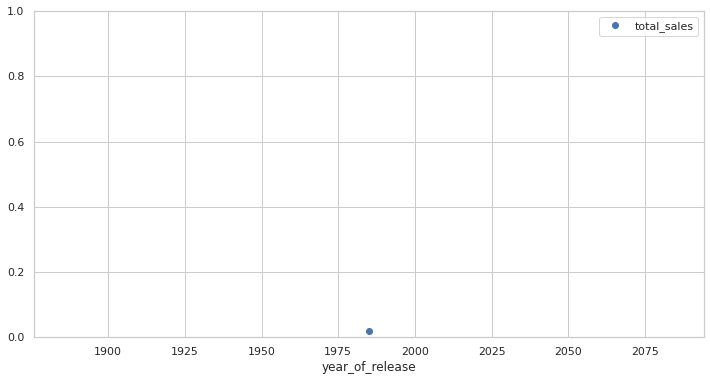

In [49]:
strange.plot(
    x='year_of_release',
    y='total_sales',
    ylim=(0, 1),
    style='o',
    grid=True,
    figsize=(12, 6),
)


Согласно данным это какаяе-то ошибка. Ее можно убрать с расчетов.

Вывод: все платформы снижают свой рост к 2015 году, в 2013 году  появилась pc4 платформа и даже она прошла более короткий жизненный цикл, в 2015 году начала снижать свои продажи. Лидер продаж в период с 12-16 год стали: PS3, x360. C 2013 по 2016 лидером была ps4, она и является потенциально прибыльной.

## Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [50]:
import matplotlib.pyplot as plt

Объем продаж 1985-2016 г.г.


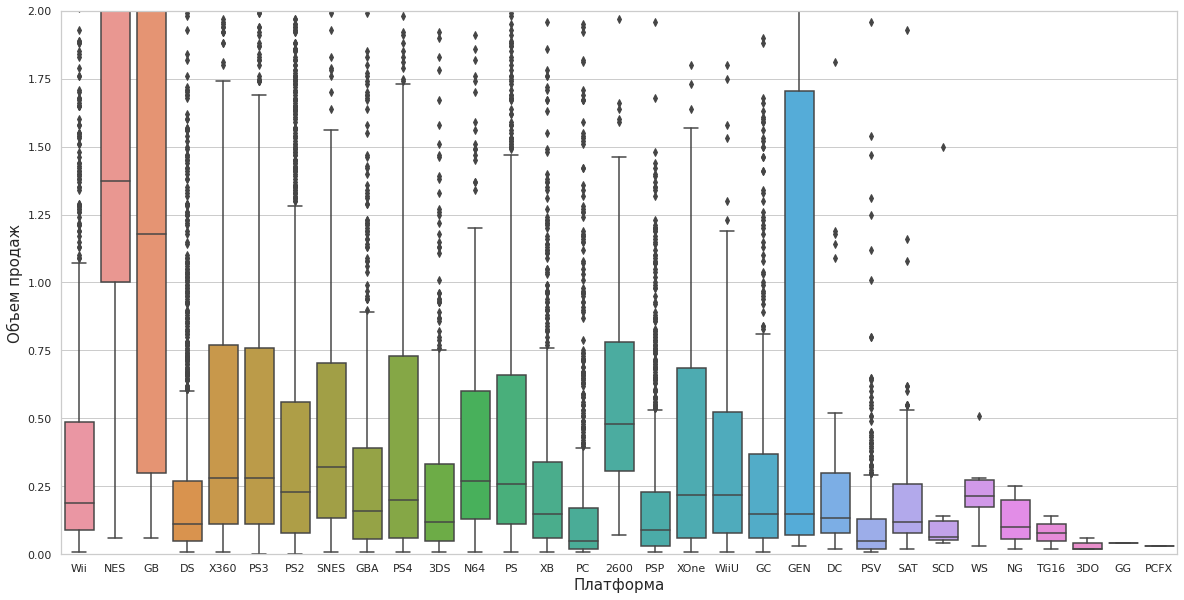

In [51]:
print("Объем продаж 1985-2016 г.г.")
plt.figure(figsize=(20,10))
plt.ylim(0, 2)
sns.boxplot(data=games, x='platform', y='total_sales');
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Объем продаж',fontsize=15)
plt.show();

Объем продаж 2012-2016 г.г.


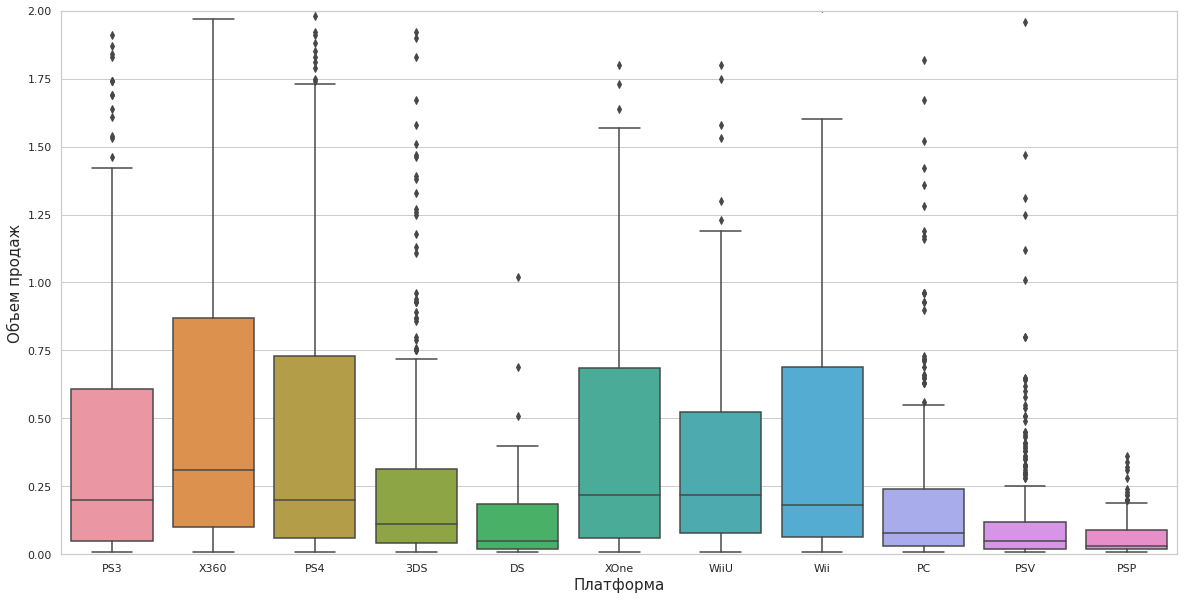

In [52]:
print("Объем продаж 2012-2016 г.г.")
plt.figure(figsize=(20,10))
plt.ylim(0, 2)
sns.boxplot(data=actual_data, x='platform', y='total_sales');
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Объем продаж',fontsize=15)
plt.show();

In [53]:
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


На данном графике и таблице видны лидирующие платформы за период:PS4, Ps3, Wii, WiiU, X360, XOne - это видно по их медианному значению. 

Диаграмма рассеивания XOne


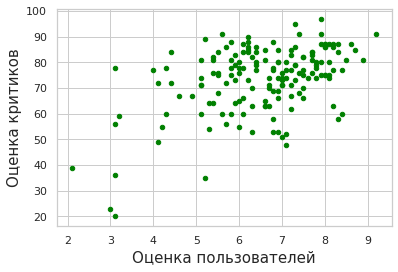

In [54]:
#Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

print("Диаграмма рассеивания XOne")
XOne = actual_data.query('platform == "XOne"')
XOne.plot(x='user_score', y='critic_score', kind='scatter', c='green')
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Оценка критиков',fontsize=15)
plt.show();

In [56]:
actual_data.year_of_release.min()

2012

<font color='Blue'><b>Далее взяла актуальный/рассматриваемый период.</b></font><br></b></font><br>

Кореляция данных по платформе XOne


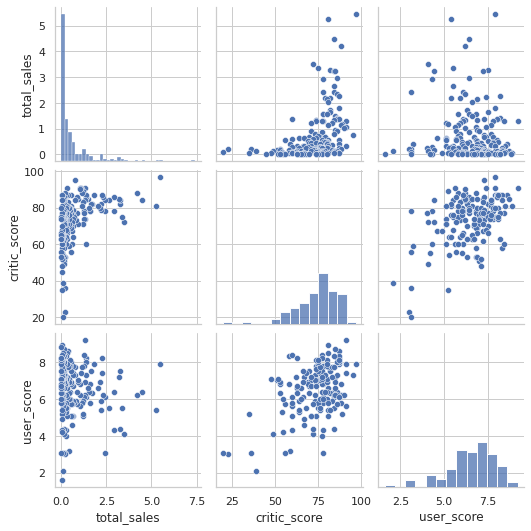

In [57]:
print("Кореляция данных по платформе XOne")
sns.set_style("whitegrid")
sns.pairplot(actual_data[actual_data.platform == "XOne"][['total_sales', 'critic_score', 'user_score']])
plt.show()

Кореляция данных по платформе XOne оценка пользователей к продажам


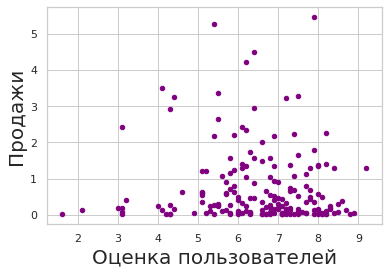

In [58]:
print("Кореляция данных по платформе XOne оценка пользователей к продажам")
XOne = actual_data.query('platform == "XOne"')
XOne.plot(x='user_score', y='total_sales', kind='scatter', c='purple')
plt.xlabel('Оценка пользователей', fontsize=20)
plt.ylabel('Продажи',fontsize=20)
plt.show();

Кореляция данных по платформе XOne оценка критиков к продажам


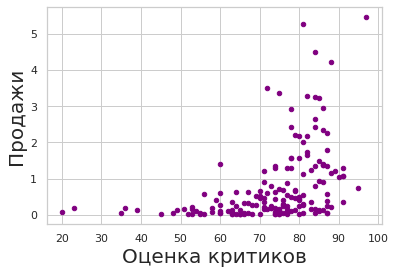

In [59]:
print("Кореляция данных по платформе XOne оценка критиков к продажам")
XOne = actual_data.query('platform == "XOne"')
XOne.plot(x='critic_score', y='total_sales', kind='scatter', c='purple')
plt.xlabel('Оценка критиков', fontsize=20)
plt.ylabel('Продажи',fontsize=20)
plt.show();

XOne имеет большой диапазон оценок. Высокие оценки критиков ведут к продажам.Пользователи дают очень противоречивые оценки.

In [60]:
print("Матрица корреляций XOne")
actual_data[actual_data.platform == "XOne"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


По корреляции видно, что оценка пользовтаелей не влияет на продажи. А вот критиков оказывает воздействие.

In [61]:
WiiU = actual_data.query('platform == "WiiU"')
PS4 = actual_data.query('platform == "PS4"')
PC = actual_data.query('platform == "PC"')

In [62]:
print("Матрица корреляций WiiU")
WiiU_cor = WiiU[['critic_score','user_score', 'total_sales']]
WiiU_cor.corr()

Матрица корреляций WiiU


,critic_score,user_score,total_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
total_sales,0.34838,0.400219,1.000000


In [63]:
print("Матрица корреляций PS4")
PS4_cor = PS4[['critic_score','user_score', 'total_sales']]
PS4_cor.corr()

Матрица корреляций PS4


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


In [64]:
print("Матрица корреляций PC")
PC_cor = PC[['critic_score','user_score', 'total_sales']]
PC_cor.corr()

Матрица корреляций PC


,critic_score,user_score,total_sales
critic_score,1.000000,0.432587,0.237243
user_score,0.432587,1.000000,-0.121867
total_sales,0.237243,-0.121867,1.000000


In [65]:
platforms=['PC', 'PS4', 'WiiU', 'XOne']

In [66]:
for i in platforms:
    print('Корреляция:', i)
    print(actual_data[actual_data['platform'] == i][['critic_score','user_score', 'total_sales']].corr())
    print()

Корреляция: PC
              critic_score  user_score  total_sales
critic_score      1.000000    0.432587     0.237243
user_score        0.432587    1.000000    -0.121867
total_sales       0.237243   -0.121867     1.000000

Корреляция: PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000

Корреляция: WiiU
              critic_score  user_score  total_sales
critic_score       1.00000    0.770080     0.348380
user_score         0.77008    1.000000     0.400219
total_sales        0.34838    0.400219     1.000000

Корреляция: XOne
              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.416998
user_score        0.472462    1.000000    -0.068925
total_sales       0.416998   -0.068925     1.000000



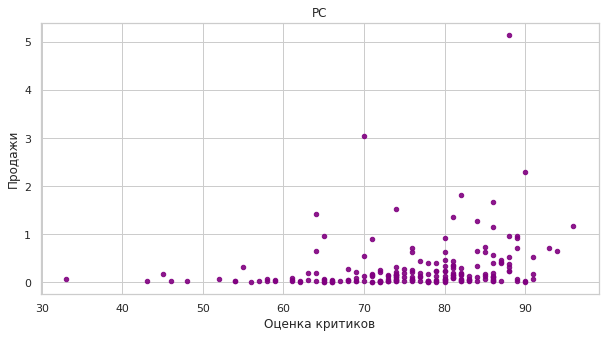

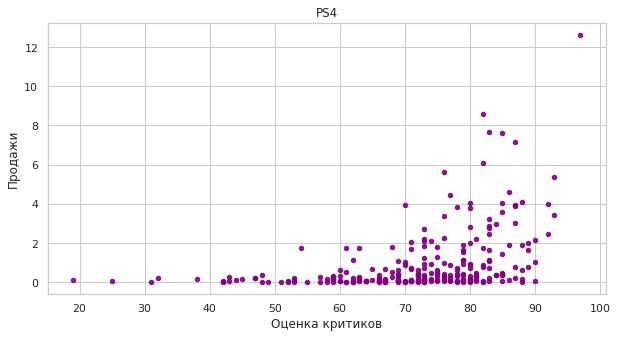

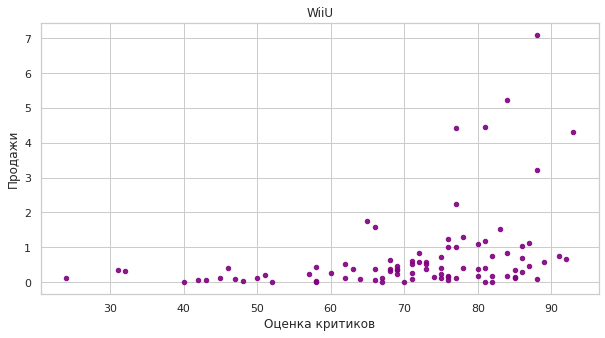

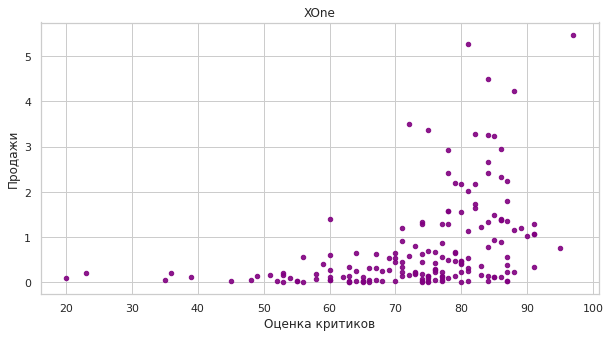

In [67]:
for i in platforms:
    actual_data[actual_data['platform'] == i].plot(x='critic_score', y='total_sales', kind='scatter', c='purple', alpha=0.9, xlabel = 'Оценка критиков', ylabel = 'Продажи', figsize = (10,5), title = i)

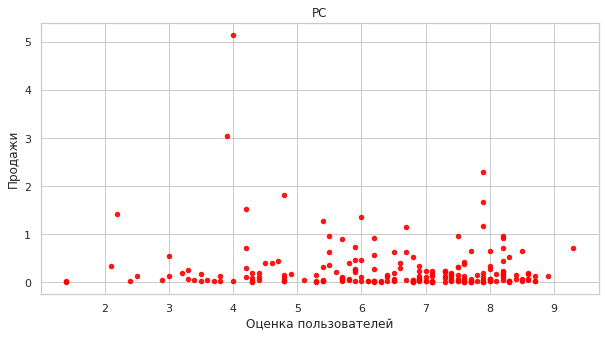

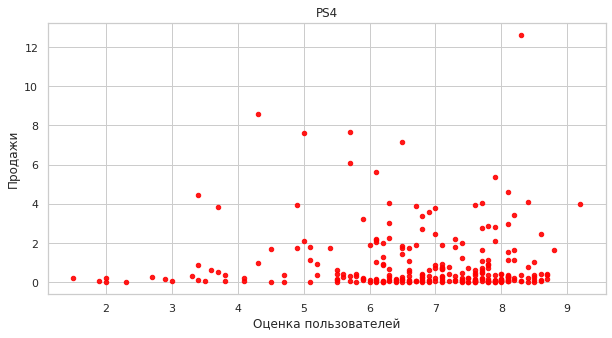

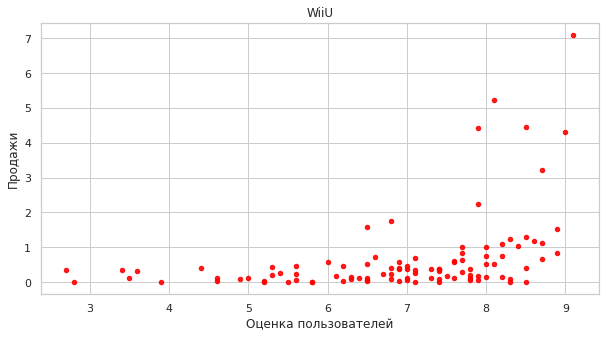

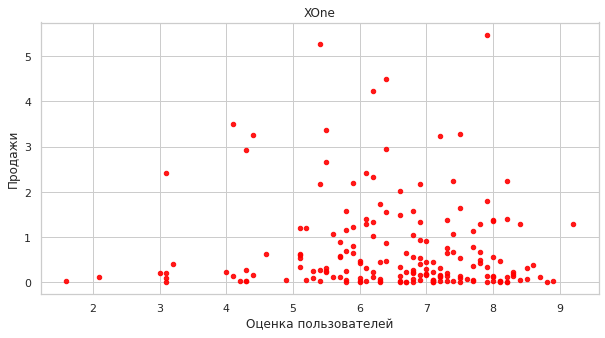

In [68]:
for i in platforms:
    actual_data[actual_data['platform'] == i].plot(x='user_score', y='total_sales', kind='scatter', c='red', alpha=0.9, xlabel = 'Оценка пользователей', ylabel = 'Продажи', figsize = (10,5), title = i)

WiiU на продажи влияют и оценки пользователей и критиков, PS4 оценки пользователей вообще не имеют влияние, только критиков, аналогично и для PC платформы.

#Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [69]:
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')
actual_data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01


In [70]:
actual_data.year_of_release.min()

2012

Распределение по жанрам за акутальный период


Text(0, 0.5, 'Количество продаж')

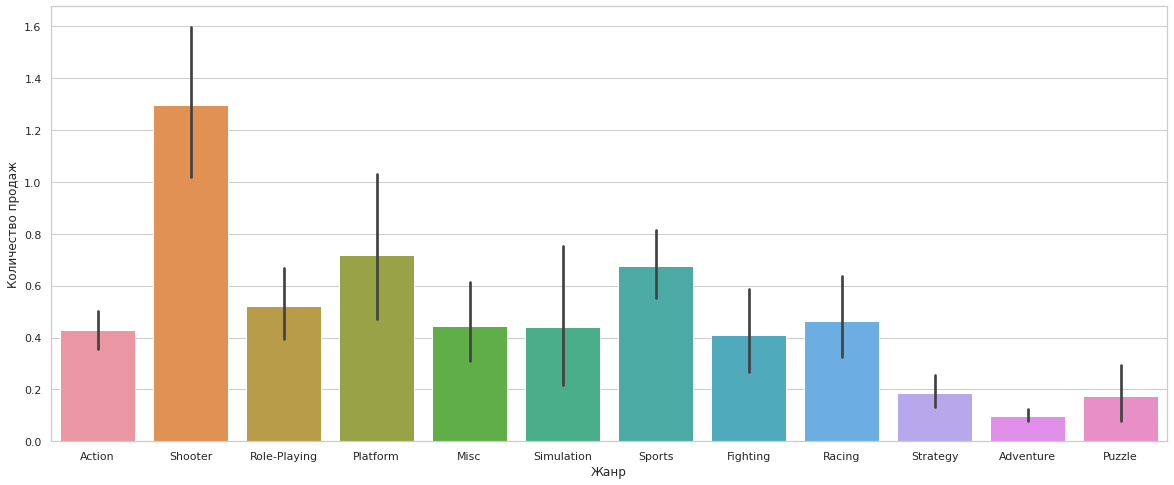

In [71]:
print("Распределение по жанрам за акутальный период")
sns.set_style('whitegrid')
plt.figure(figsize=(20, 8))
sns.barplot(data = actual_data, x='genre', y='total_sales')
plt.xlabel("Жанр")
plt.ylabel("Количество продаж")

In [72]:
distr_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre


,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


Количество продаж по жанрам в рассматриваемый период


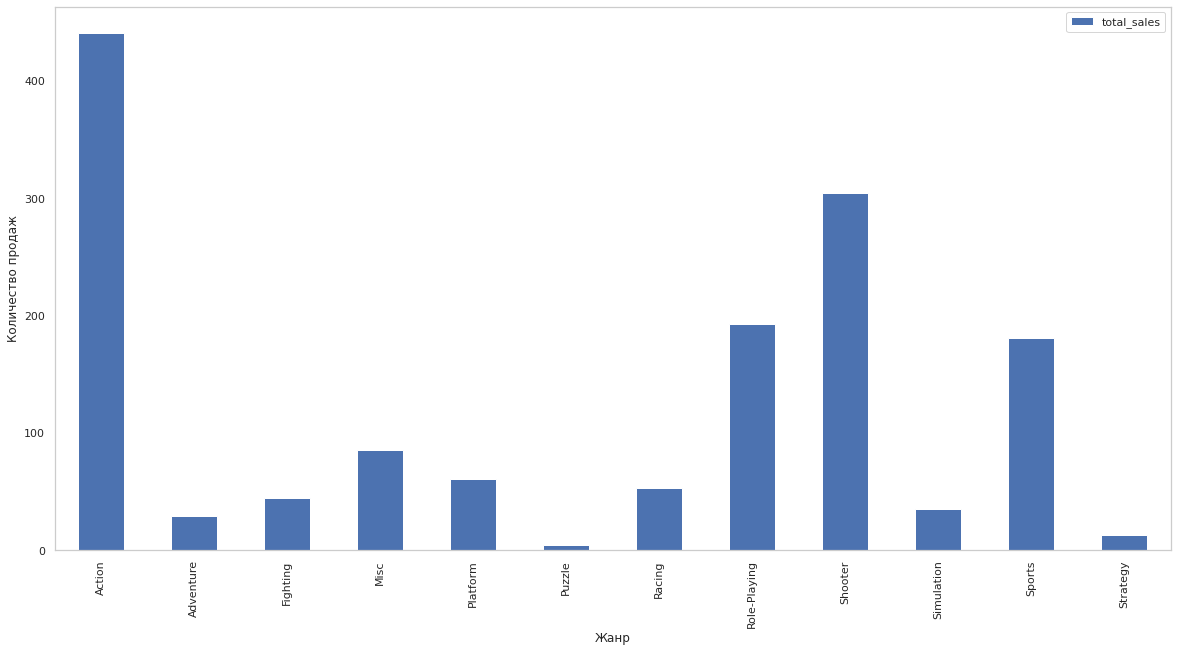

In [73]:
print("Количество продаж по жанрам в рассматриваемый период")
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').plot(kind='bar',grid=False, figsize=(20, 10))
plt.xlabel("Жанр")
plt.ylabel("Количество продаж")
plt.legend()
#другой график для анализа жанров.

Самый активный жанр и продаваемый в топ-5 -action.

In [74]:
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


Самые продаваемый за период с 2012-2016 по всем платформам - action, shooter, role-playing and sports по всем платформам.

In [75]:
#среднее значение по продажам на платформах по жанру
print('Среднее значение продаж по жанрам')
genre_mean = actual_data.pivot_table(index='genre', values=['name','total_sales'],aggfunc={'name':'count','total_sales': 'mean'}).sort_values('total_sales',ascending=False).reset_index()
genre_mean.head(10)

Среднее значение продаж по жанрам


,genre,name,total_sales
0,Shooter,235,1.296723
1,Platform,85,0.717647
2,Sports,268,0.675634
3,Role-Playing,370,0.521081
4,Racing,115,0.465217
5,Misc,192,0.442917
6,Simulation,80,0.439000
7,Action,1031,0.427856
8,Fighting,109,0.408165
9,Strategy,71,0.187887


In [76]:
actual_data['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

Среднее значение продаж по жанрам


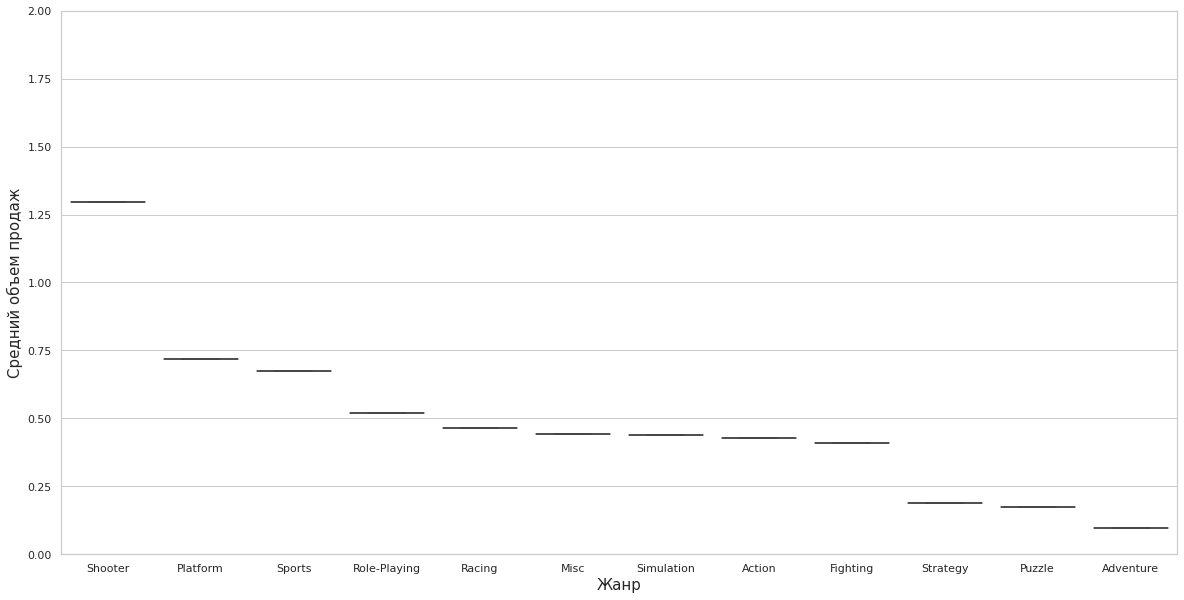

In [77]:
print("Среднее значение продаж по жанрам")
plt.figure(figsize=(20,10))
plt.ylim(0, 2)
sns.boxplot(data=genre_mean, x='genre', y='total_sales');
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Средний объем продаж',fontsize=15)
plt.show();

In [78]:
#медианное значение по продажам на платформах по жанру
print('Медианное значение продаж по жанрам')
genre_median = actual_data.pivot_table(index='genre', values=['name','total_sales'],aggfunc={'name':'count','total_sales': 'median'}).sort_values('total_sales',ascending=False).reset_index()
genre_median.head(10)

Медианное значение продаж по жанрам


,genre,name,total_sales
0,Shooter,235,0.44
1,Sports,268,0.24
2,Platform,85,0.21
3,Role-Playing,370,0.14
4,Racing,115,0.14
5,Fighting,109,0.13
6,Action,1031,0.12
7,Misc,192,0.12
8,Simulation,80,0.12
9,Strategy,71,0.08


Медианное значение продаж по жанрам


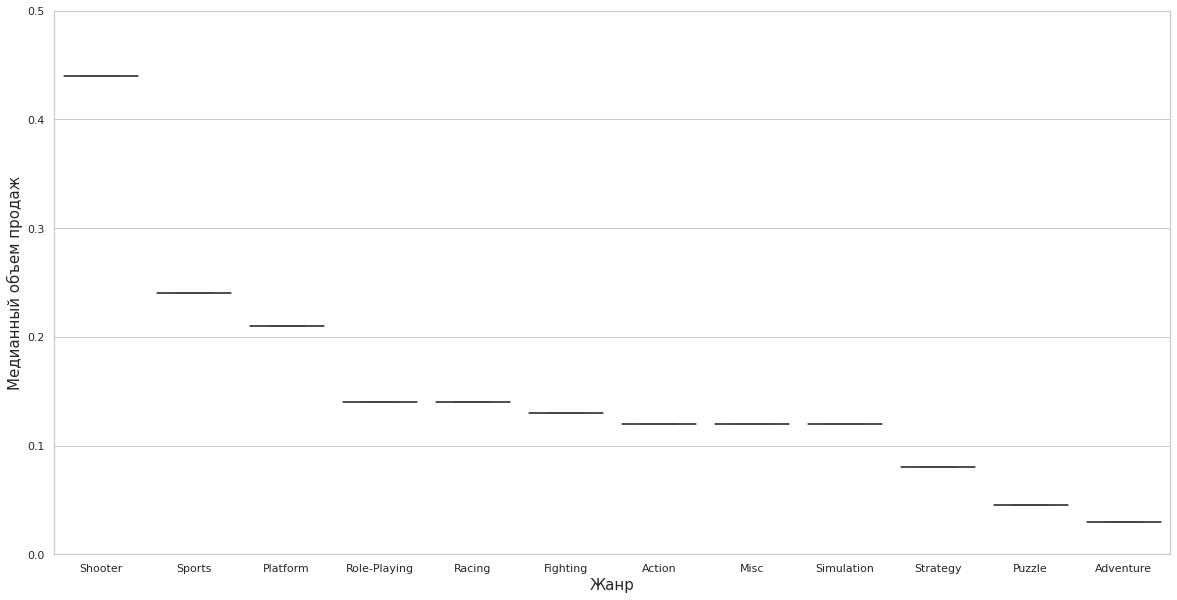

In [79]:
print("Медианное значение продаж по жанрам")
plt.figure(figsize=(20,10))
plt.ylim(0, 0.5)
sns.boxplot(data=genre_median, x='genre', y='total_sales');
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Медианный объем продаж',fontsize=15)
plt.show();

# Шаг 4. Портрет пользователя каждого региона 

Определите для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [80]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


Топ платформы Северной Америки


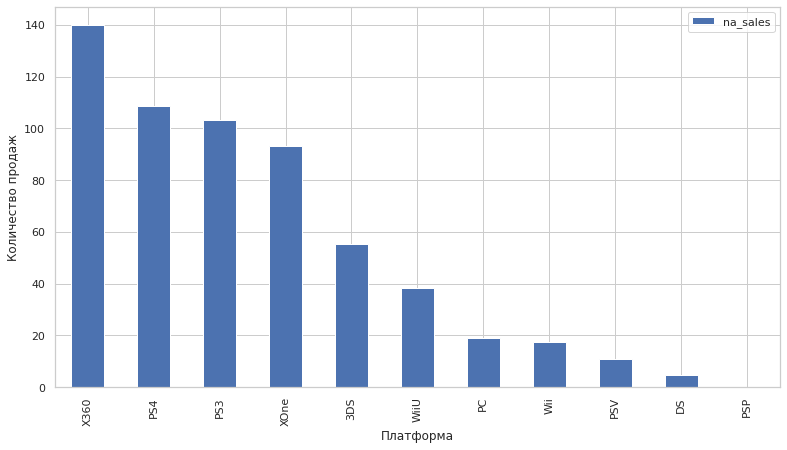

In [81]:
#топ-5 платформ за актуальный период анализа проекта
# Северная Америка
print('Топ платформы Северной Америки')
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(13,7))
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")
plt.legend()


In [82]:
top_na_platform = actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')
top_na_platform.reset_index().rename_axis(None, axis=1)


,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,WiiU,38.10
6,PC,19.12
7,Wii,17.45
8,PSV,10.98
9,DS,4.59


В лидерах X360, а также PS4, PS3, XOne. Жители Северной Америки предпочитат Х360, однако другие платформы тоже хорошо исползуются на рынке.

Топ платформы Европы


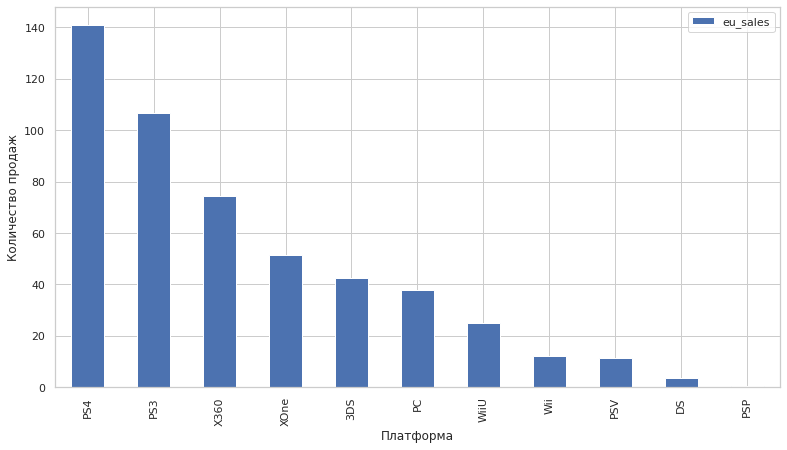

In [83]:
# Европа
print('Топ платформы Европы')
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(13,7))
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")
plt.legend()


In [84]:
top_eu_platform =actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')
top_eu_platform.reset_index().rename_axis(None, axis=1)

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,PC,37.76
6,WiiU,25.13
7,Wii,11.92
8,PSV,11.36
9,DS,3.53


В лидерах PS4, Ps3, X3600 - три крупные платформы, которые охватывают почти 80% рынка. 

Топ платформы Японии


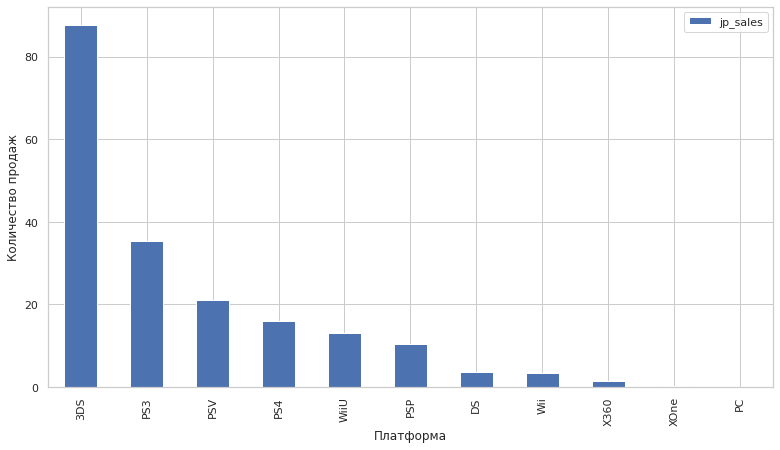

In [85]:
# Япония
print('Топ платформы Японии')
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(13,7))
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")
plt.legend()


In [86]:
top_jp_platform =actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')
top_jp_platform.reset_index().rename_axis(None, axis=1)

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,PSP,10.47
6,DS,3.72
7,Wii,3.39
8,X360,1.57
9,XOne,0.34


Лидер 3DS в Японии. Лидер зарабатывает более чем в два раза по сравнению с PS3.

In [87]:
# Самые популярные жанры Северной Америки, Европы и Японии
print('Топ жанры Северной Америки')
top_genre_na=actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')
top_genre_na = top_genre_na.reset_index().rename_axis(None, axis=1)
top_genre_na

Топ жанры Северной Америки


,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Platform,25.38
6,Fighting,19.79
7,Racing,17.22
8,Adventure,8.92
9,Simulation,7.97


Топ жанров игр: Action,Shooter, Sports

In [88]:
print('Топ жанры Европы')
top_genre_eu=actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')
top_genre_eu = top_genre_eu.reset_index().rename_axis(None, axis=1)
top_genre_eu

Топ жанры Европы


,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,Misc,26.32
6,Platform,21.41
7,Simulation,14.55
8,Fighting,10.79
9,Adventure,9.46


In [89]:
print('Топ жанры Японии')
top_genre_jp = actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')
top_genre_jp = top_genre_jp.reset_index().rename_axis(None, axis=1)
top_genre_jp


Топ жанры Японии


,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,Shooter,9.23
6,Platform,8.63
7,Adventure,8.24
8,Sports,8.01
9,Strategy,2.88


In [90]:
top_genre_jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genre     12 non-null     object 
 1   jp_sales  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


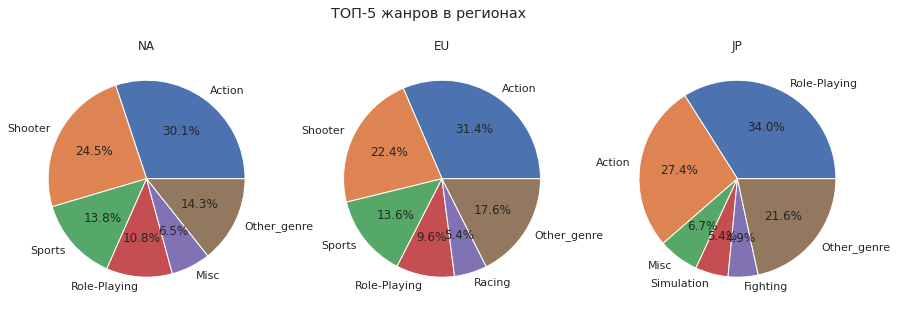

In [112]:
games_fresh = actual_data.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

In [91]:
top_genre_jp

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,Shooter,9.23
6,Platform,8.63
7,Adventure,8.24
8,Sports,8.01
9,Strategy,2.88


In [92]:
def set_type(row):
    row_number = row.name + 1
    if row_number <=5:
            return row['genre']
    return 'Other'   

In [93]:
top_genre_jp['type'] =  top_genre_jp.apply(set_type, axis=1)
top_genre_jp

,genre,jp_sales,type
0,Role-Playing,65.44,Role-Playing
1,Action,52.80,Action
2,Misc,12.86,Misc
3,Simulation,10.41,Simulation
4,Fighting,9.44,Fighting
5,Shooter,9.23,Other
6,Platform,8.63,Other
7,Adventure,8.24,Other
8,Sports,8.01,Other
9,Strategy,2.88,Other


In [94]:
top_genre_jp_pie=top_genre_jp.groupby('type', as_index=False).agg({'jp_sales': 'sum'})
top_genre_jp_pie.set_index('type')

,jp_sales
type,
Action,52.80
Fighting,9.44
Misc,12.86
Other,41.63
Role-Playing,65.44
Simulation,10.41


Доля рынка по жанрам в Японии


<AxesSubplot:ylabel='jp_sales'>

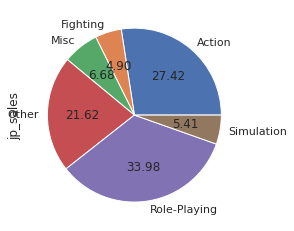

In [95]:
print('Доля рынка по жанрам в Японии')
top_genre_jp_pie.set_index('type').plot.pie(y='jp_sales', legend=False, autopct='%.2f')

In [98]:
top_genre_eu


,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,Misc,26.32
6,Platform,21.41
7,Simulation,14.55
8,Fighting,10.79
9,Adventure,9.46


In [99]:
top_genre_eu['type'] =  top_genre_eu.apply(set_type, axis=1)
top_genre_eu

,genre,eu_sales,type
0,Action,159.34,Action
1,Shooter,113.47,Shooter
2,Sports,69.09,Sports
3,Role-Playing,48.53,Role-Playing
4,Racing,27.29,Racing
5,Misc,26.32,Other
6,Platform,21.41,Other
7,Simulation,14.55,Other
8,Fighting,10.79,Other
9,Adventure,9.46,Other


In [100]:
top_genre_eu_pie=top_genre_eu.groupby('type', as_index=False).agg({'eu_sales': 'sum'})
top_genre_eu_pie.set_index('type')

,eu_sales
type,
Action,159.34
Other,89.10
Racing,27.29
Role-Playing,48.53
Shooter,113.47
Sports,69.09


Доля рынка по жанрам в Европе


<AxesSubplot:ylabel='eu_sales'>

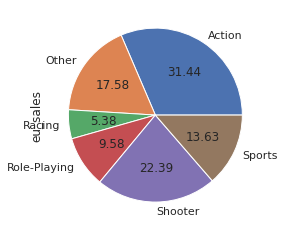

In [101]:
print('Доля рынка по жанрам в Европе')
top_genre_eu_pie.set_index('type').plot.pie(y='eu_sales', legend=False, autopct='%.2f')

In [102]:
top_genre_na

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Platform,25.38
6,Fighting,19.79
7,Racing,17.22
8,Adventure,8.92
9,Simulation,7.97


In [103]:
top_genre_na['type'] =  top_genre_na.apply(set_type, axis=1)
top_genre_na

,genre,na_sales,type
0,Action,177.84,Action
1,Shooter,144.77,Shooter
2,Sports,81.53,Sports
3,Role-Playing,64.00,Role-Playing
4,Misc,38.19,Misc
5,Platform,25.38,Other
6,Fighting,19.79,Other
7,Racing,17.22,Other
8,Adventure,8.92,Other
9,Simulation,7.97,Other


In [104]:
top_genre_na_pie=top_genre_na.groupby('type', as_index=False).agg({'na_sales': 'sum'})
top_genre_na_pie.set_index('type')

,na_sales
type,
Action,177.84
Misc,38.19
Other,84.64
Role-Playing,64.00
Shooter,144.77
Sports,81.53


Доля рынка по жанрам в Северной Америке


<AxesSubplot:ylabel='na_sales'>

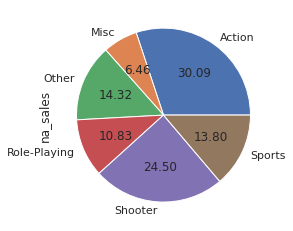

In [105]:
print('Доля рынка по жанрам в Северной Америке')
top_genre_na_pie.set_index('type').plot.pie(y='na_sales', legend=False, autopct='%.2f')

Итого: Пользователи Европы и Северной Америки играют в одни и те же консоли и игровая индустрия больше развита для игр дома, поэтому популярны жанры - Action, Sports, Shooter. В Японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - Role-Playing и Action.

In [106]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе?
print('Влияние рейтинга на продажи по регионам')
ESRB = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
print(ESRB)

Влияние рейтинга на продажи по регионам
           eu_sales  jp_sales  na_sales
rating                                 
E            113.03     28.33    114.37
E10+          55.37      8.19     75.70
M            193.96     21.20    231.57
T             52.96     26.02     66.02
undefined     91.50    108.84    103.31


Итог: рейтинг влияет на продажи по регионам. Так рейтинг Е10+ имел мало продаж в Японии, в то время как в Северной Америке и Европе очень хорошо продавался. Лидер по проажам это игры с рейтингом М в Северной Америке.

# Шаг 5. Проверяем гипотезы


1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.


In [107]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,undefined,28.31


Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [108]:
XOne = actual_data[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]
PC = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]
print('Средний пользовательский рейтинг платформы Xbox One:', XOne['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC', PC['user_score'].mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.4286407766990274


<font color='Blue'><b>Здесь две выборки, разного размера и друг от друга никак не зависящие - поэтому используем для проверки метод st.ttest_ind. Размер разный, то есть и вероятность что дисперсии могут быть одинаковыми, поэтому пропишу equal_var=False</b></font><br></b></font><br>

In [109]:
#проверяю первую гипотезу

alpha = .05

results = st.ttest_ind(XOne['user_score'], PC['user_score'], equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


<font color='Blue'><b>p-значение 54% - это говорит о том, что очень высока вероятность что средние пользовательские рейтинги этих двух платформ одинаковы или близки к этому. Поэтому альтернативную гипотезу никак не подтвердить.</b></font><br></b></font><br>

In [110]:
# Комментарий ревьюера
XOne, PC

(                                 name platform  year_of_release         genre  \
 165                Grand Theft Auto V     XOne             2014        Action   
 179    Call of Duty: Advanced Warfare     XOne             2014       Shooter   
 242                 Halo 5: Guardians     XOne             2015       Shooter   
 270                         Fallout 4     XOne             2015  Role-Playing   
 373           Assassin's Creed: Unity     XOne             2014        Action   
 ...                               ...      ...              ...           ...   
 16544     Assassin's Creed Chronicles     XOne             2016        Action   
 16597     Saints Row: Gat out of Hell     XOne             2015        Action   
 16630        Sébastien Loeb Rally Evo     XOne             2016        Racing   
 16643               Rugby Challenge 3     XOne             2016        Sports   
 16660                Prison Architect     XOne             2016        Action   
 
        na_sal

Да, рейтинги одинаковые. Альтернатвная Гипотеза не подтвердилась.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<font color='Blue'><b>Здесь также имеем две не зависмые друг от друга генеральные совокупности. Размер и дисперсия также разные. Поэтому вводим параметр False в equal_var. </b></font><br></b></font><br>

In [114]:
action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]
sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]
#print('Средний пользовательский рейтинг жанра Action:', Action['user_score'].mean())
#print('Средний пользовательский рейтинг жанра Sports', Sports['user_score'].mean())

#Комментарий ревьюера 2
print('Средний пользовательский рейтинг жанра Action:', action['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports', sports['user_score'].mean())


Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports 5.455897435897437


In [115]:
#проверяю вторую гипотезу

alpha = .05

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


# Шаг 6. Общий вывод



1. На шаге первом ознакомились и подготовили данные к анализу - удалили пробелы, не верный формат данных.
Обнаружила значени tbd - "to be determined" и заменила это значение на NaN. Пропуски в столбцах рейтингов оставили без оценок, чтобы не  влиять на рейтинги в целом. Вычислила общее количество продаж по всем регионам добавив столбец total_sales. Нашли данные по платформе которые не соответсвовали реальности.
2. На втором шаге провела исследовательский анализ данных, а именно: игры начали выпускаться с 1994 года и пик продаж игр был в 2008 году. 
Срок платформ около 9 лет, но цикл стал ускоряться и платформы стали жить меньше.
За основу прогноза на 2017 год взяла акиуальный период в пять лет с 2012 по 2016 г.г.
3 потенциально прибыльных платформ - PS4, XOne, 3DS.
Платформы имеют определенные игры, которые приносили хорошие продажи.
Больше всего игр жанра Action, затем идут Sports, misc и adventure.
Лучше всего покупают игры жанра Action, Sports идёт на втором месте, Shooter неожиданно стоит на третьем месте по продажам, но при этом самый выгодный.
Adventure сильно отстаёт по продажам, хотя игр выпускается много.
3. На третем шаге составила портрет пользователя по регионам Северная Америка, Европа, Япония.
В NA самая популярная платформа X360. Европейцы предпочитают PS4. В Японии популярны 3DS.
В NA и EU самые популярные жанры совпадают. В JP вкусы отличаются.
В Европе и Северной Америке лидировали по продажам платформы с рейтингом М. В Японии опять не так - рейтинг Е.
4. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не подтвердилась.
Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась.